# Import the required files


In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

# Loading the data

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data("C:\\Users\\91769\\Desktop\\mnistCNN.h5")

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analysing the data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

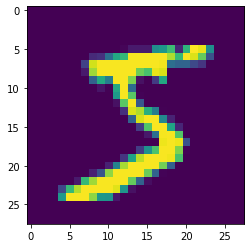

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

# Reshaping the data

In [7]:
X_train=X_train.reshape(60000,28,28,1).astype('float32')
X_test=X_test.reshape(10000,28,28,1).astype('float32')

# Applying one hot encoding

In [8]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Adding CNN layers

In [10]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

# Compiling the model

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


# Train the model

In [12]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=32)

Epoch 1/2
1875/1875 [==============================] - 108s 57ms/step - loss: 0.2698 - accuracy: 0.9487 - val_loss: 0.1109 - val_accuracy: 0.9682
Epoch 2/2
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0741 - accuracy: 0.9778 - val_loss: 0.0878 - val_accuracy: 0.9734


# Observing the metrics

In [13]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.08776932209730148, 0.9733999967575073]


# Test the model

In [14]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 206ms/step
[[5.9321028e-09 5.7988537e-13 6.1030621e-09 4.3646396e-06 2.6445493e-12
  4.0840187e-10 2.3328073e-14 9.9999547e-01 3.9265256e-08 8.6445581e-08]
 [9.3056729e-10 9.8675814e-09 9.9999464e-01 2.1085398e-06 5.0669052e-12
  4.5871162e-10 3.1624027e-06 4.0549144e-11 1.4889361e-08 3.0512489e-12]
 [5.7484414e-08 9.9974161e-01 1.7771699e-05 5.7951738e-08 3.3137374e-05
  2.4294309e-06 1.5805225e-07 6.6405607e-07 2.0409084e-04 1.4571059e-08]
 [9.9947912e-01 1.3911052e-08 2.8522989e-05 8.2442313e-08 9.1802048e-07
  1.1754041e-06 1.2690426e-04 1.5480890e-07 2.0074813e-06 3.6116803e-04]]


In [15]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Observing the metrics

In [16]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.08776932209730148, 0.9733999967575073]


# Test the model

In [17]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 49ms/step
[[5.9321028e-09 5.7988537e-13 6.1030621e-09 4.3646396e-06 2.6445493e-12
  4.0840187e-10 2.3328073e-14 9.9999547e-01 3.9265256e-08 8.6445581e-08]
 [9.3056729e-10 9.8675814e-09 9.9999464e-01 2.1085398e-06 5.0669052e-12
  4.5871162e-10 3.1624027e-06 4.0549144e-11 1.4889361e-08 3.0512489e-12]
 [5.7484414e-08 9.9974161e-01 1.7771699e-05 5.7951738e-08 3.3137374e-05
  2.4294309e-06 1.5805225e-07 6.6405607e-07 2.0409084e-04 1.4571059e-08]
 [9.9947912e-01 1.3911052e-08 2.8522989e-05 8.2442313e-08 9.1802048e-07
  1.1754041e-06 1.2690426e-04 1.5480890e-07 2.0074813e-06 3.6116803e-04]]


In [18]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Save the model

In [19]:
model.save('mnistCNN.h5')

# model.save('models/mnistCNN.h5')

X_train:(60000, 28, 28)
y_train:(60000,)
X_test:(10000, 28, 28)
y_test:(10000,)


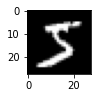

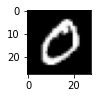

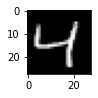

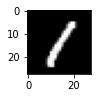

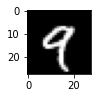

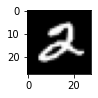

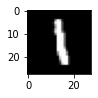

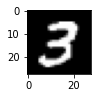

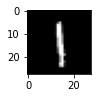

In [20]:
from keras.datasets import mnist
from matplotlib import pyplot
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print('X_train:' +str(X_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(X_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [21]:
!pip install watson-machine-learning-client

In [22]:
!pip install -U ibm-watson-machine-learning

In [23]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
        "url":"https://us-south.ml.cloud.ibm.com",
        "apikey":"19haDN1sR_7pcqZuyH7VdNESl5PqlMMkOwWje8xVyceS"
}
client=APIClient(wml_credentials)

In [24]:
client

In [25]:
def guid_space_name(client,digit):
    space=client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name']==digit)['metadata']['id'])


In [26]:
space_uid=guid_space_name(client,'Digit-Deployment')
print("Space UID"+space_uid)

Space UIDa4ba3136-4e8d-4877-97c4-e4de0da5a07a


In [27]:
client.set.default_space(space_uid)

'SUCCESS'

In [28]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [29]:
software_space_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.2-py3.10")

In [30]:
software_space_uid

'f65bd165-f057-55de-b5cb-f97cf2c0f393'

In [31]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 3877-199F

 Directory of C:\Users\91769\Desktop

17-11-2022  11:18    <DIR>          .
17-11-2022  08:44    <DIR>          ..
17-11-2022  08:38    <DIR>          .ipynb_checkpoints
13-11-2022  11:52    <DIR>          admindroid
15-11-2022  16:17       958,565,038 ai-b9-3a5e_(afternoon_session)-day_13 (1080p).mp4
15-11-2022  16:17       816,531,314 ai-b9-3a5e_(evening_session)-day_14 (1080p).mp4
04-09-2022  23:18    <DIR>          certificate
17-11-2022  11:18            84,749 cloud_model_deployment.ipynb
15-11-2022  21:38    <DIR>          cnn-digit-recognition-webapp-master
10-09-2022  19:19    <DIR>          cognizant
03-09-2022  18:16    <DIR>          college events
26-09-2022  19:53        42,517,296 Cryptography & Network Security (Ripped from Amazon Kindle eBooks by Sai Seena)-1-181.pdf
02-10-2022  10:06         5,122,721 CS8711-Cloud Computing Lab Manual E-content.pdf
23-09-2022  09:28    <DIR>          db
17-11-2022  10:5

In [32]:
!tar -zcvf digit_classification_model.tgz mnistCNN.h5

a mnistCNN.h5


In [33]:
model_details=client.repository.store_model(model='digit_classification_model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN MODEL BUILDING",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.9',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [34]:
model_id=client.repository.get_model_id(model_details)

In [35]:
model_id

'b9b8a615-017c-4035-ae5f-aabc136ec450'

In [36]:
client.repository.download(model_id,'minst.tar.gb')

Successfully saved model content to file: 'minst.tar.gb'


'C:\\Users\\91769\\Desktop/minst.tar.gb'